# Improved Machine Learning Pipeline Applied to DonorsChoose Data
## CAPP 30254 Homework 3

The module `pipeline_library` contains updated functions that allow us to apply the machine learning pipeline. The general steps of the pipeline are as follows:

1. Load the data
2. Explore the data
3. Preprocess and clean the data
4. Generate features for the ML model
5. Build a machine learning model
6. Evaluate the model

Here I will use the pipeline to analyze data from the K-12 school charity site DonorsChoose to predict which classroom projects will receive full funding within 60 days of being posted. The data is a modified version of data from https://www.kaggle.com/c/kdd-cup-2014-predicting-excitement-at-donors-choose/data.

## Load and explore the data
I'll start by loading and exploring the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import pipeline_library as pl

In [2]:
proj_df = pl.load_csv_data("data/projects_2012_2013.csv")
proj_df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


Check the columns' data types.

In [3]:
proj_df.dtypes

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
school_city                                object
school_state                               object
school_metro                               object
school_district                            object
school_county                              object
school_charter                             object
school_magnet                              object
teacher_prefix                             object
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
resource_type                              object
poverty_level                              object


Check frequency and location of null values.

In [4]:
proj_df.isnull().sum()

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_ncesid                              9233
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_metro                              15224
school_district                             172
school_county                                 0
school_charter                                0
school_magnet                                 0
teacher_prefix                                0
primary_focus_subject                        15
primary_focus_area                           15
secondary_focus_subject                   40556
secondary_focus_area                      40556
resource_type                                17
poverty_level                                 0
grade_level                             

## Preprocess data and prepare features and label
Next I will preprocess and clean the data, prepare selected columns to be features, and prepare the label for the machine learning models.

The following are the columns in the dataset and the cleaning/transformation they will require. The features and labels need to be numeric variables (requirement of sci-kit learn) that have meaning, so some of the columns in our dataset will be irrelevant and/or will need to be transformed.
- 'projectid' - won't be a feature (IDs don't carry any meaning for our analysis)
- 'teacher_acctid' - won't be a feature
- 'schoolid' - won't be a feature
- 'school_ncesid' - won't be a feature
- 'school_latitude' - ok (numeric)
- 'school_longitude' - ok (numeric)
- 'school_city' - not numeric, too many different values, won't be a feature
- 'school_state' - not numeric, won't be a feature - could group by region of the US
- 'school_metro' - need to handle nulls, transform to dummy
- 'school_district' - not numeric, won't be a feature
- 'school_county' - not numeric, won't be a feature
- 'school_charter' - transform to dummy
- 'school_magnet' - transform to dummy
- 'teacher_prefix' - transform to dummy
- 'primary_focus_subject' - not numeric, too many different values, won't be a feature
- 'primary_focus_area' - 7 values - could become a dummy
- 'secondary_focus_subject' - not numeric, too many different values, won't be a feature
- 'secondary_focus_area' - 7 values - could become a dummy
- 'resource_type' - 6 values - could become a dummy
- 'poverty_level' - make numeric
- 'grade_level' - need to handle nulls, make numeric
- 'total_price_including_optional_support' - ok (numeric)
- 'students_reached' - need to handle nulls
- 'eligible_double_your_impact_match' - need to handle nulls, transform to dummy
- 'date_posted' - use to calculate label, month could become a feature
- 'datefullyfunded' - use to calculate label

### Handle null values and dummy transformations for features
The columns `school_metro`, `grade_level`, and `students_reached` contain null values. We will fill these nulls with the mode value for the categorical variables and with the median value for the numerical variable.

`teacher_prefix` takes on values "Mrs.", "Ms.", "Mr.", and "Dr.". I want to convert this to a gender dummy variable `teacher_female`, so since there are only 2 rows with "Dr." (therefore with gender unknown) and there are many more females (Mrs. and Ms.) than males (Mr.), we'll treat Dr. as an NA that will take on the mode value, female.

The columns `school_charter`, `school_magnet`, and `eligible_double_your_impact_match` currently have "t" and "f" for boolean values, so we will transform them in place - 0 for False and 1 for True.

We will generate dummy variables from `school_metro`, `poverty_level` and `grade_level`.

In [5]:
proj_df["school_metro"].value_counts(dropna=False)

urban       62267
suburban    33084
NaN         15224
rural       14401
Name: school_metro, dtype: int64

In [6]:
proj_df["grade_level"].value_counts(dropna=False)

Grades PreK-2    47730
Grades 3-5       39242
Grades 6-8       21479
Grades 9-12      16522
NaN                  3
Name: grade_level, dtype: int64

In [7]:
pl.fill_na_with(proj_df, "mode", cols=["school_metro", "grade_level"])
pl.fill_na_with(proj_df, "median", cols=["students_reached"])

Replacing 15224 nulls in column school_metro with mode value urban
Replacing 3 nulls in column grade_level with mode value Grades PreK-2
Replacing 59 nulls in column students_reached with median value 30.0


In [8]:
proj_df["teacher_prefix"].value_counts(dropna=False)

Mrs.    60190
Ms.     48511
Mr.     16273
Dr.         2
Name: teacher_prefix, dtype: int64

In [9]:
pl.make_dummy_from_categorical(proj_df, "teacher_prefix", ["Mrs.", "Ms.", "Dr."], "teacher_female")

In [10]:
proj_df["school_charter"].value_counts(dropna=False)

f    113340
t     11636
Name: school_charter, dtype: int64

In [11]:
pl.rename_values(proj_df, "school_charter", {"t": 1, "f": 0})
pl.rename_values(proj_df, "school_magnet", {"t": 1, "f": 0})
pl.rename_values(proj_df, "eligible_double_your_impact_match", {"t": 1, "f": 0})

In [12]:
proj_df["school_charter"].value_counts(dropna=False)

0    113340
1     11636
Name: school_charter, dtype: int64

In [13]:
proj_df = pd.concat([proj_df, pd.get_dummies(proj_df["school_metro"])], axis=1)

In [14]:
proj_df = pd.concat([proj_df, pd.get_dummies(proj_df["poverty_level"])], axis=1)

In [15]:
proj_df = pd.concat([proj_df, pd.get_dummies(proj_df["grade_level"])], axis=1)

### Convert to datetime and generate label
The label for the analysis I'm doing is whether or not a project was fully funded within 60 days of posting. The original data gave us the columns `date_posted` and `datefullyfunded` so I now need to prepare the label, which I will call `fundedin60days`. I'll convert the original columns to the datetime type, find the difference between the two columns (intermediate variable `daystofunding`), and then produce the dummy column, which has a value of 0 if more than 60 days passed before full funding, or a 1 if it was 60 days or less.

In [16]:
pl.cols_to_datetime(proj_df, ["date_posted", "datefullyfunded"])
proj_df["daystofunding"] = proj_df["datefullyfunded"] - proj_df["date_posted"]
cutoff = pd.Timedelta("60 days")

In [17]:
pl.make_dummy_from_continuous(proj_df, "daystofunding", cutoff, gt_cutoff=False, new_col="fundedin60days")

In [18]:
proj_df[["date_posted", "datefullyfunded", "daystofunding", "fundedin60days"]].head()

,date_posted,datefullyfunded,daystofunding,fundedin60days
0,2013-04-14,2013-05-02,18 days,1
1,2012-04-07,2012-04-18,11 days,1
2,2012-01-30,2012-04-15,76 days,0
3,2012-10-11,2012-12-05,55 days,1
4,2013-01-08,2013-03-25,76 days,0


In [19]:
label = "fundedin60days"

Now that I have generated the features, I define the columns I want to use as features before moving on to applying different models. 

In [20]:
selected_features = [
    "school_latitude",
    "school_longitude",
    "school_charter",
    "school_magnet",
    "total_price_including_optional_support",
    "students_reached",
    "eligible_double_your_impact_match",
    "teacher_female",
    "rural",
    "suburban",
    "urban",
    "highest poverty",
    "high poverty",
    "moderate poverty",
    "low poverty",
    "Grades PreK-2",
    "Grades 3-5",
    "Grades 6-8",
    "Grades 9-12"
]

## Building and Evaluating Models
Now that the features and label have been prepared, I will apply several different machine learning models to the DonorsChoose data and evaluate the results.

I start by splitting the data into training and test sets, with `test_size` as an adjustable parameter (proportion of observations to use in the test set). Then I will use the training X (features) and y (label) data to fit the various models below.

In [21]:
test_size = 0.3
x_train, x_test, y_train, y_test = pl.split_data(proj_df, selected_features, label, test_size)

### Decision Tree
Now I will fit the decision tree and evaluate the results.

For a classification model, the output of `predict_proba()` is an N by 2 matrix, where N is the number of rows in the test data, and 2 is the number of classes (possible values of the label). For each test data point, `predict_proba()` gives two values - the first is the probability that the data point belongs to class 0 and the second is the probability it belongs to class 1.

In the case of the DonorsChoose data, class 0 represents the projects that won't get funded in 60 days and class 1 represents the projects that will.

I will plot the probabilities of belonging to class 1 to see the distribution and decide on a threshold. This threshold signifies the probability cutoff at which we will count the data point as correct. For example, if we set the threshold at 0.5, then a row for which the probability that the project was funded is greater than 0.5, we will count that row as having been funded. 

Then, when we pass this information to the accuracy function, which will compare the predictions to the y test set to calculate the accuracy of the model.

In [22]:
dec_tree = pl.fit_decision_tree(x_train, y_train)

(array([1.1211e+04, 0.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00,
        4.4000e+01, 1.0000e+00, 1.0000e+00, 4.0000e+00, 2.6225e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

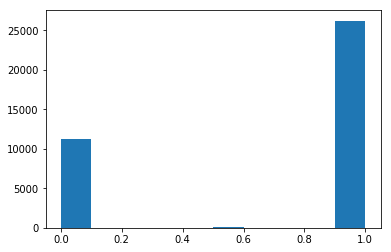

In [23]:
# use [:,1] to access the probability the data point belongs to class 1
predicted_dt_scores = dec_tree.predict_proba(x_test)[:,1]
plt.hist(predicted_dt_scores)

In [24]:
dt_threshold = 0.4
pl.evaluate_model(predicted_dt_scores, y_test, dt_threshold)

Model accuracy is 0.6425466087002907


### K-Nearest Neighbors

In [37]:
n_neighbors = 10
knn = pl.fit_knn_classifier(x_train, y_train, n_neighbors)

(array([  13.,   53., 1125.,    0., 2109., 9856., 7444.,    0., 7408.,
        9485.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

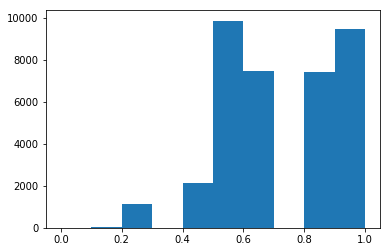

In [38]:
predicted_knn_scores = knn.predict_proba(x_test)[:,1]
plt.hist(predicted_knn_scores)

In [39]:
knn_threshold = 0.75
pl.evaluate_model(predicted_knn_scores, y_test, knn_threshold)

Model accuracy is 0.5473821780065612
